## Import Libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.utils import resample
from sklearn.metrics import silhouette_samples

## Import Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\mcdonalds.csv")

## Getting to know data

In [3]:
#R> data("mcdonalds", package = "MSA")
#R> names(mcdonalds)

df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
# R> dim(mcdonalds)
df.shape

(1453, 15)

In [5]:
#R> head(mcdonalds, 3)

df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## EDA

In [7]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

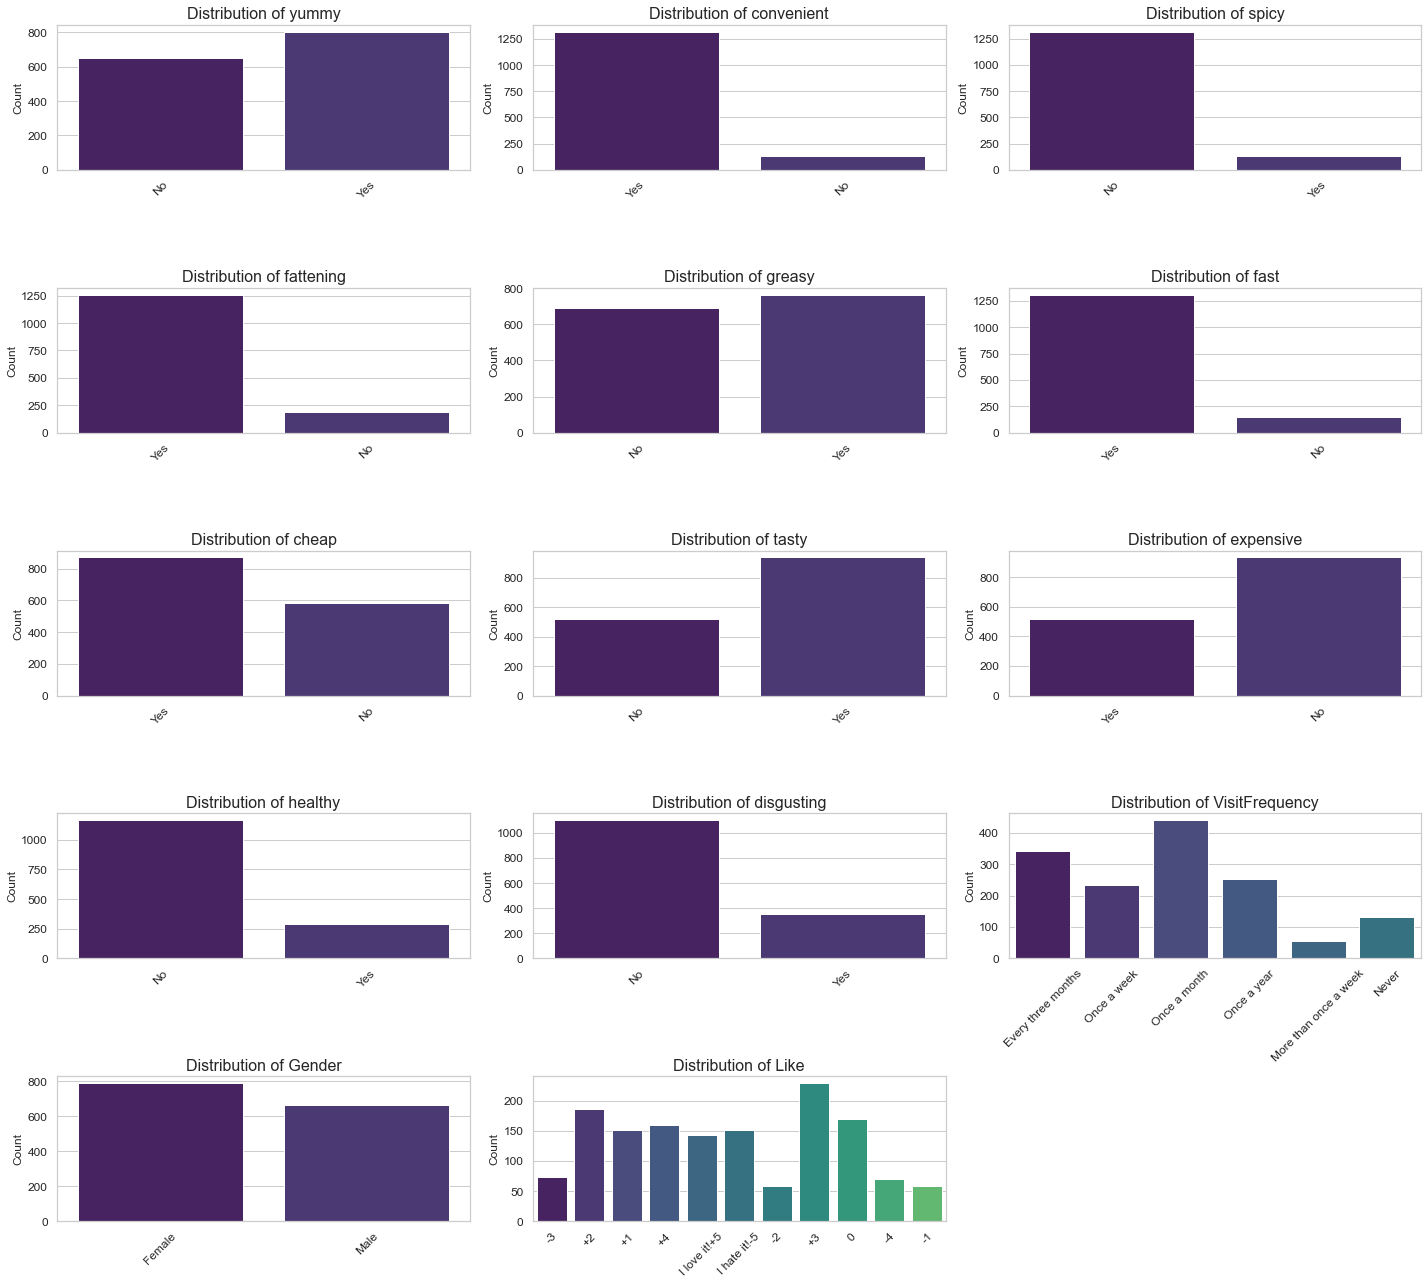

In [8]:
sns.set_theme(style="whitegrid")
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 
                    'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 
                    'VisitFrequency', 'Gender', 'Like']

palette = sns.color_palette("viridis", len(categorical_cols))

plt.figure(figsize=(20, 18))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=col, data=df, palette=palette)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Count'>

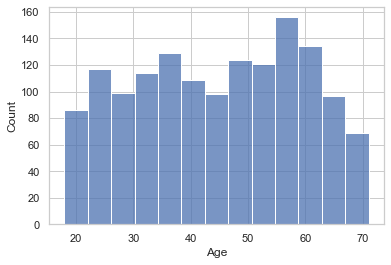

In [14]:
sns.histplot(data=df, x='Age')

## Pipeline for OHE, Standardization and PCA

In [3]:
num_col = ['Age']
num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

cat_col = df.drop(columns='Age', axis=1).columns
cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore')),
    ]
)


transformer = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_col),
        ("cat", cat_transformer, cat_col),
    ]
)

pca_pipeline = Pipeline(
    steps=[
        ("transformer", transformer),
        ("pca", PCA(n_components=11)) 
    ]
)

dfnew = pd.DataFrame(pca_pipeline.fit_transform(df))

In [4]:
dfnew

,0,1,2,3,4,5,6,7,8,9,10
0,1.321707,-0.899175,0.106760,-0.620152,0.510510,-0.596161,0.685751,-0.078542,0.193525,-0.421207,-0.465943
1,-0.295370,-0.127047,0.170762,-0.900187,-1.124434,-0.098207,0.628718,-0.296125,0.334422,0.028178,-0.175262
2,0.909195,-0.418417,1.086316,-1.015678,-0.903681,0.817719,1.185326,0.889415,0.297914,-0.689990,0.520957
3,0.403818,-1.171520,-0.483500,-0.630910,-1.477678,0.638432,-0.495571,-1.042109,-0.380684,0.035435,-0.194289
4,0.471945,-0.317562,-0.700243,0.934102,-0.096603,0.334373,0.044337,1.618753,0.140363,-0.031201,-0.694903
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.988002,1.421349,0.426528,0.369539,-0.019595,0.351813,-0.252375,-0.126301,-0.234595,0.331832,0.007629
1449,-1.421568,-0.512674,-0.184888,-0.358104,0.719319,0.699321,0.305816,-0.334207,-0.303112,0.570388,-0.346104
1450,-0.374286,-0.307783,1.516209,-1.016104,0.021309,-0.621656,-0.729851,-0.017853,0.206575,-0.285987,-0.396270
1451,-1.219904,-0.963055,0.287349,1.103577,0.559339,0.894772,0.740880,-0.108968,0.519333,0.246587,0.239788


In [5]:
pca_step = pca_pipeline.named_steps['pca']
std_dev = np.sqrt(pca_step.explained_variance_)
explained_variance = pca_step.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [6]:

n_components = len(explained_variance)
columns_per_row = 5

def print_pca_summary(start, end):
    header = " ".join([f"PC{i+1}" for i in range(start, end)])
    print(header)
    std_dev_line = "Standard deviation " + " ".join([f"{std_dev[i]:.4f}" for i in range(start, end)])
    print(std_dev_line)

    variance_line = "Proportion of Variance " + " ".join([f"{explained_variance[i]:.4f}" for i in range(start, end)])
    print(variance_line)
    cumulative_line = "Cumulative Proportion " + " ".join([f"{cumulative_variance[i]:.4f}" for i in range(start, end)])
    print(cumulative_line)

print("Importance of components:")
for i in range(0, n_components, columns_per_row):
    end_index = min(i + columns_per_row, n_components)
    print_pca_summary(i, end_index)
    print()  # Blank line between sections

Importance of components:
PC1 PC2 PC3 PC4 PC5
Standard deviation 1.1576 1.0446 0.8562 0.6943 0.6319
Proportion of Variance 0.1912 0.1557 0.1046 0.0688 0.0570
Cumulative Proportion 0.1912 0.3470 0.4516 0.5204 0.5774

PC6 PC7 PC8 PC9 PC10
Standard deviation 0.5781 0.5183 0.4877 0.4523 0.4407
Proportion of Variance 0.0477 0.0383 0.0339 0.0292 0.0277
Cumulative Proportion 0.6251 0.6634 0.6973 0.7265 0.7542

PC11
Standard deviation 0.4068
Proportion of Variance 0.0236
Cumulative Proportion 0.7778



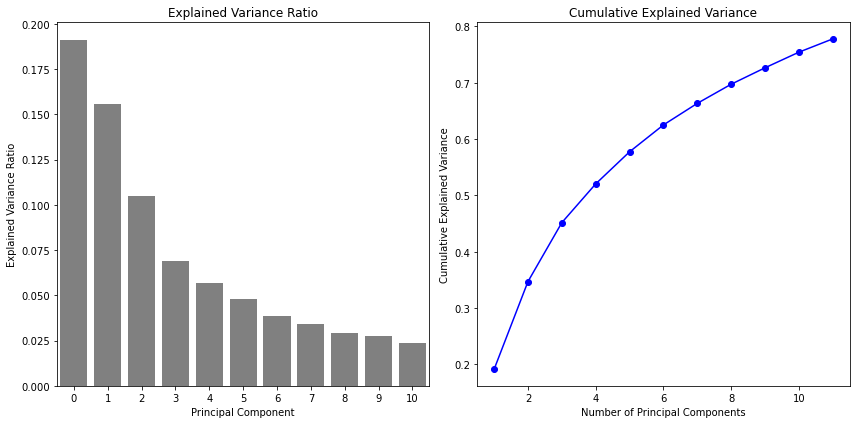

In [7]:
plt.figure(figsize=(12, 6))

# Plot explained variance ratio
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(len(explained_variance)), y=explained_variance, color='grey')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(cumulative_variance)) + 1, cumulative_variance, marker='o', color='blue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

In [8]:
pca_step = pca_pipeline.named_steps['pca']

loadings = pca_step.components_.T * np.sqrt(pca_step.explained_variance_)

cat_feature_names = transformer.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out()
all_feature_names = num_col + list(cat_feature_names)
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(11)], index=all_feature_names)

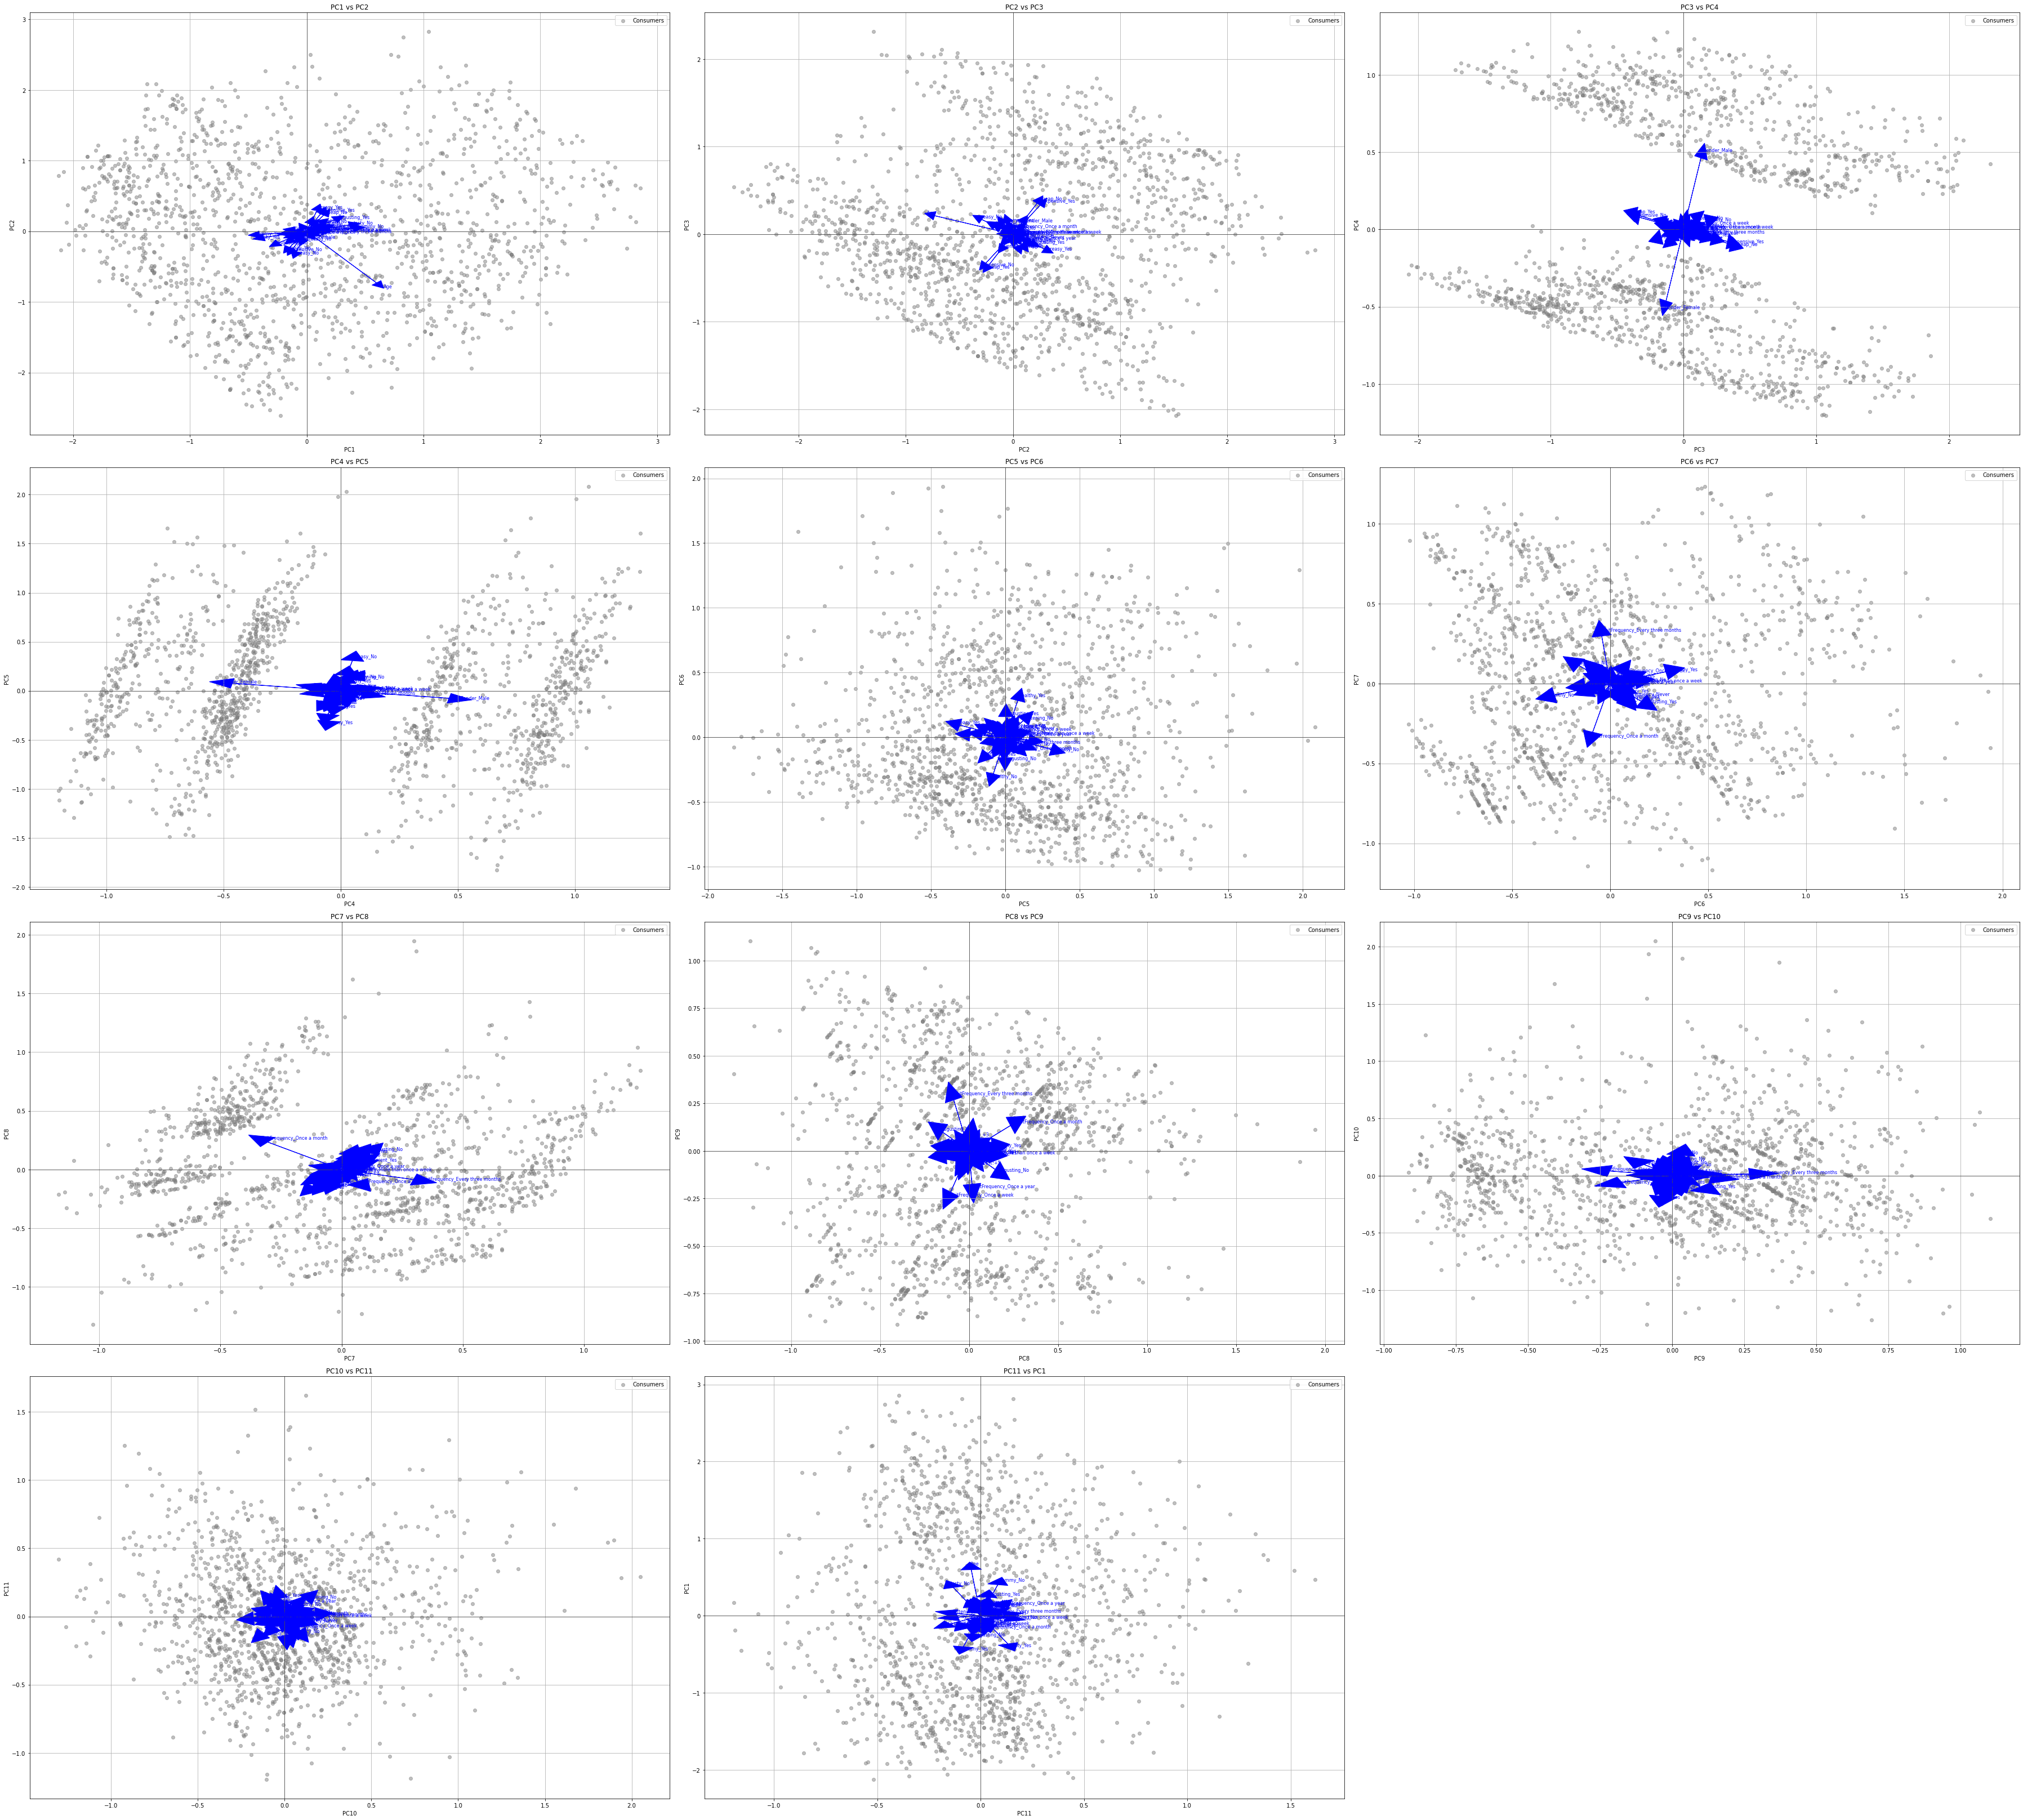

In [9]:

plt.figure(figsize=(50, 45))
num_components = 11
for i in range(num_components):
    plt.subplot(4, 3, i + 1)  
    plt.scatter(dfnew.iloc[:, i], dfnew.iloc[:, (i + 1) % num_components], color='grey', alpha=0.5, label='Consumers')
    
    for j in range(loading_df.shape[0]):
        plt.arrow(0, 0, loading_df.iloc[j, i], loading_df.iloc[j, (i + 1) % num_components],
                  head_width=0.1, head_length=0.1, fc='blue', ec='blue')
        plt.text(loading_df.iloc[j, i] * 1.1, loading_df.iloc[j, (i + 1) % num_components] * 1.1,
                 loading_df.index[j], color='blue', fontsize=8)
    
    plt.xlabel(f'PC{i+1}')
    plt.ylabel(f'PC{(i + 1) % num_components + 1}')
    plt.title(f'PC{i+1} vs PC{(i + 1) % num_components + 1}')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Kmeans 

In [10]:
np.random.seed(1234)
data = dfnew 
clusters = {}
for k in range(2, 9):  
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234, verbose=0)
    kmeans.fit(data)
    clusters[k] = kmeans

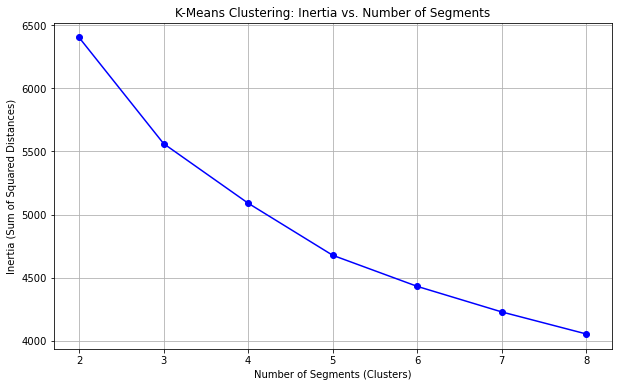

In [11]:
num_clusters = list(clusters.keys())
inertia = [clusters[k].inertia_ for k in num_clusters]
plt.figure(figsize=(10, 6))  
plt.plot(num_clusters, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('K-Means Clustering: Inertia vs. Number of Segments')
plt.grid(True)
plt.show()

In [12]:
k4 = clusters[4] 

In [15]:
r4 = silhouette_samples(data, k4.labels_)

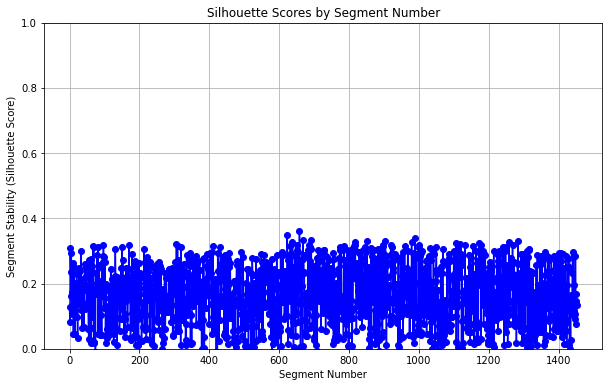

In [17]:
sorted_indices = np.argsort(k4.labels_)
sorted_silhouette_scores = r4[sorted_indices]
plt.figure(figsize=(10, 6))
plt.plot(sorted_silhouette_scores, 'b-', marker='o')
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability (Silhouette Score)')
plt.title('Silhouette Scores by Segment Number')
plt.grid(True)
plt.show()

## Hierchichal Clustering

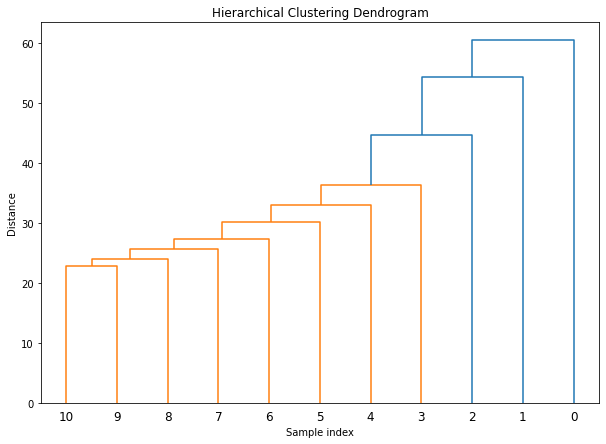

In [19]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
data = dfnew.T 

distance_matrix = pdist(data, metric='euclidean')
linked = linkage(distance_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

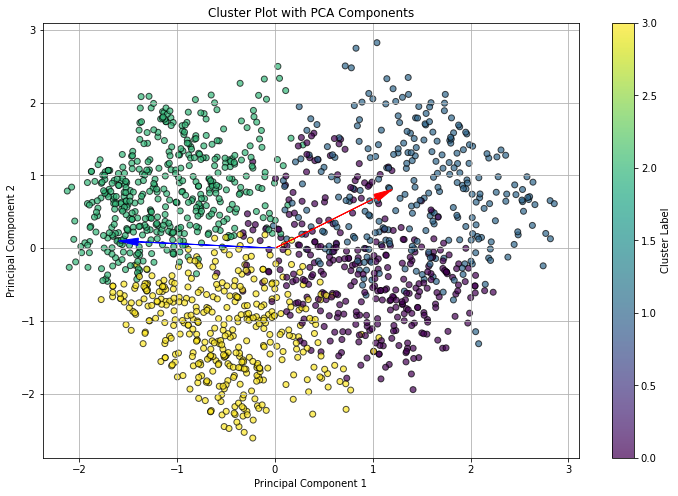

In [20]:
labels = k4.labels_
pc1, pc2 = dfnew.iloc[:, 0], dfnew.iloc[:, 1] 
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pc1, pc2, c=labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Cluster Label')
pca_components = pca_pipeline.named_steps['pca'].components_
origin = np.mean(dfnew, axis=0)

for i, (component, color) in enumerate(zip(pca_components, ['r', 'b'])):
    plt.arrow(origin[0], origin[1], component[0]*2, component[1]*2, color=color,
              head_width=0.1, head_length=0.2, fc=color, ec=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with PCA Components')
plt.grid(True)
plt.show()

<Figure size 864x576 with 0 Axes>

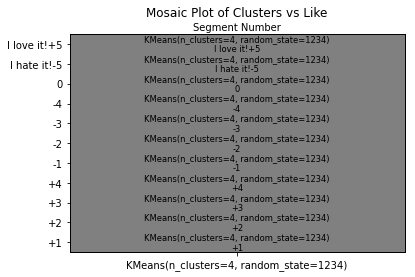

In [27]:

from statsmodels.graphics.mosaicplot import mosaic
datak4 = k4.labels_
df_clustered = pd.DataFrame({
    'Cluster': k4,
    'Like': df['Like'] 
})

contingency_table = pd.crosstab(df_clustered['Cluster'], df_clustered['Like'])
data = contingency_table.stack().reset_index(name='count')
colors = plt.get_cmap('tab10')
unique_clusters = data['Cluster'].unique()
color_map = {cluster: colors(i) for i, cluster in enumerate(unique_clusters)}

plt.figure(figsize=(12, 8))
mosaic(data, ['Cluster', 'Like'], properties=lambda key: {'color': color_map.get(key[0], 'gray')})
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.title('Mosaic Plot of Clusters vs Like')
plt.show()

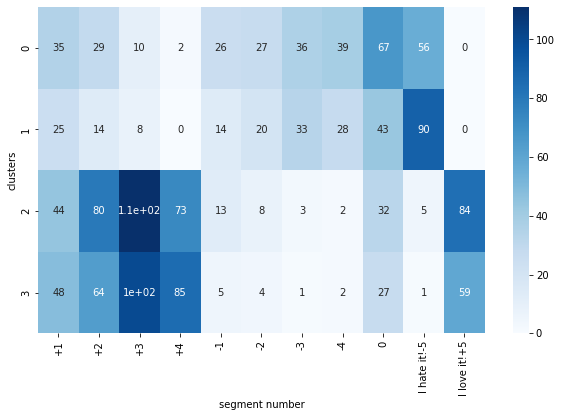

In [29]:
datak4 = k4.labels_ 
like_counts = pd.crosstab(datak4, df['Like'])

plt.figure(figsize=(10, 6))
sns.heatmap(like_counts, annot=True, cmap='Blues', cbar=True)
plt.title("")
plt.xlabel("segment number")
plt.ylabel("clusters")
plt.show()

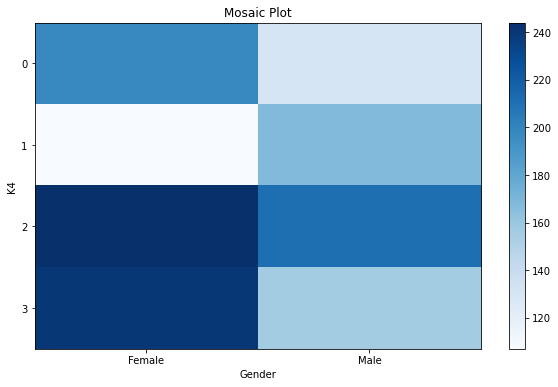

In [30]:
contingency_table = pd.crosstab(datak4, df['Gender'])

plt.figure(figsize=(10, 6))
plt.imshow(contingency_table, aspect='auto', cmap='Blues')
plt.colorbar()
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
plt.title('Mosaic Plot')
plt.xlabel('Gender')
plt.ylabel('K4')
plt.show()

In [37]:
df_clustered.columns

Index(['Cluster', 'Like', 'target'], dtype='object')